In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#read in training data
data = pd.read_csv("training_imputed.csv", index_col="User ID")

In [ ]:
# Make sure the column is in datetime format
data["Date/Time"] = pd.to_datetime(data["Date/Time"])

# Sort the data
data = data.sort_values(by=["User ID", "Date/Time"])

#data.drop(columns=["Date", "Date/Time", "Time"], inplace=True)

In [ ]:
data.head()

,Age,Date/Time,Sleep,HRV,Sleep Heart Rate,high_pos,low_pos,high_neg,low_neg,Neutral,Date,Steps,Time,Tiredness,Calm,Nutrition,Hydration,Performance,Gender_encode
User ID,,,,,,,,,,,,,,,,,,,
2N57YUL8awNjuVW7zj3HbKF19Ap2,24,2024-11-20 13:46:19.037000+00:00,30714.0,70.0,55.0,0,0,0,0,1,2024-11-20,18272,13:46:19,26.0,71.0,20.0,67.0,50.0,0
2N57YUL8awNjuVW7zj3HbKF19Ap2,24,2024-11-21 11:12:48.628000+00:00,33338.0,82.0,54.0,1,0,0,0,0,2024-11-21,14013,11:12:48,50.0,35.0,50.0,61.0,69.0,0
2N57YUL8awNjuVW7zj3HbKF19Ap2,24,2024-11-21 16:26:39.221000+00:00,33338.0,82.0,54.0,0,0,1,0,0,2024-11-21,3755,16:26:39,50.0,6.0,50.0,50.0,13.0,0
2N57YUL8awNjuVW7zj3HbKF19Ap2,24,2024-11-22 14:01:05.160000+00:00,27884.0,58.0,54.0,0,0,0,0,1,2024-11-22,13720,14:01:05,50.0,66.0,62.0,38.0,64.0,0
2N57YUL8awNjuVW7zj3HbKF19Ap2,24,2024-11-22 18:23:36.345000+00:00,27884.0,58.0,54.0,0,0,1,0,0,2024-11-22,12871,18:23:36,72.0,15.0,56.0,58.0,16.0,0


In [ ]:
# Features to scale per individual
#features = ["Steps", "Sleep", "HRV", "Sleep Heart Rate", "Hydration", "Tiredness", "Calm", "Nutrition", "Performance"]
features = data.columns
features = features.drop("Date")
features = features.drop("Date/Time")
features = features.drop("Time")
features = features.drop("Age")
features = features.drop("Gender_encode")

# Copy the data
data_scaled = data.copy()

# Loop through each person (assuming person_id is in the index)
for person_id in data_scaled.index.unique():
    mask = data_scaled.index == person_id
    person_data = data_scaled.loc[mask, features]

    # Only scale if person_data has more than one row
    if len(person_data) > 1:
        scaled_values = StandardScaler().fit_transform(person_data)
        data_scaled.loc[mask, features] = scaled_values

<ipython-input-70-22a31fb6ac6f>:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.58976782  1.6955825  -0.58976782 -0.58976782 -0.58976782 -0.58976782
 -0.58976782  1.6955825   1.6955825  -0.58976782 -0.58976782  1.6955825
 -0.58976782 -0.58976782 -0.58976782 -0.58976782 -0.58976782 -0.58976782
 -0.58976782 -0.58976782  1.6955825  -0.58976782  1.6955825  -0.58976782
  1.6955825  -0.58976782  1.6955825  -0.58976782 -0.58976782  1.6955825
  1.6955825  -0.58976782 -0.58976782 -0.58976782 -0.58976782 -0.58976782
 -0.58976782 -0.58976782 -0.58976782 -0.58976782 -0.58976782  1.6955825
 -0.58976782  1.6955825  -0.58976782 -0.58976782  1.6955825  -0.58976782
  1.6955825  -0.58976782  1.6955825  -0.58976782 -0.58976782 -0.58976782
  1.6955825  -0.58976782 -0.58976782 -0.58976782 -0.58976782 -0.58976782
 -0.58976782 -0.58976782]' has dtype incompatible with int64, please explicitly cast to a compatible dtype f

In [ ]:
#scale some features globally
data_scaled[["Age", "Gender_encode"]] = StandardScaler().fit_transform(data[["Age", "Gender_encode"]])

In [ ]:
#remove any duplicated features
data_scaled = data_scaled.loc[:, ~data_scaled.columns.duplicated()]

,Age,Date/Time,Sleep,HRV,Sleep Heart Rate,high_pos,low_pos,high_neg,low_neg,Neutral,Date,Steps,Time,Tiredness,Calm,Nutrition,Hydration,Performance,Gender_encode
User ID,,,,,,,,,,,,,,,,,,,
2N57YUL8awNjuVW7zj3HbKF19Ap2,-2.182127,2024-11-20 13:46:19.037000+00:00,0.043300,0.746137,0.332965,-0.589768,-0.262613,-0.589768,0.0,1.101946,2024-11-20,1.956332,13:46:19,-1.515696,1.741433,-1.928169,1.046289,0.014971,-4.622545
2N57YUL8awNjuVW7zj3HbKF19Ap2,-2.182127,2024-11-21 11:12:48.628000+00:00,0.498359,2.055395,-0.106265,1.695582,-0.262613,-0.589768,0.0,-0.907485,2024-11-21,1.269029,11:12:48,-0.412833,-0.072323,-0.243625,0.617161,0.994721,-4.622545
2N57YUL8awNjuVW7zj3HbKF19Ap2,-2.182127,2024-11-21 16:26:39.221000+00:00,0.498359,2.055395,-0.106265,-0.589768,-0.262613,1.695582,0.0,-0.907485,2024-11-21,-0.386372,16:26:39,-0.412833,-1.533404,-0.243625,-0.169575,-1.892963,-4.622545
2N57YUL8awNjuVW7zj3HbKF19Ap2,-2.182127,2024-11-22 14:01:05.160000+00:00,-0.447485,-0.563122,-0.106265,-0.589768,-0.262613,-0.589768,0.0,1.101946,2024-11-22,1.221746,14:01:05,-0.412833,1.489523,0.430193,-1.027832,0.736892,-4.622545
2N57YUL8awNjuVW7zj3HbKF19Ap2,-2.182127,2024-11-22 18:23:36.345000+00:00,-0.447485,-0.563122,-0.106265,-0.589768,-0.262613,1.695582,0.0,-0.907485,2024-11-22,1.084737,18:23:36,0.598126,-1.079965,0.093284,0.402596,-1.738266,-4.622545


In [ ]:
data_scaled.drop(columns=["Date", "Date/Time", "Time"], inplace=True)

In [ ]:

features = data_scaled.columns
# === STEP 1: Run K-Means clustering ===
k = 4 # choose number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

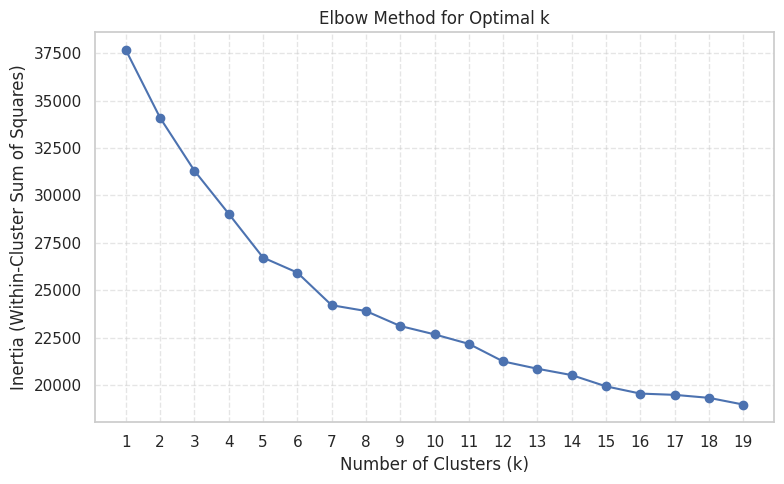

In [ ]:
# === Step 2: Run KMeans for different k values and store inertia ===
inertia = []
k_range = range(1, 20)  # Try k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# === Step 3: Plot the Elbow Curve ===
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.xticks(k_range)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
#add clusters to dataframe
data_scaled["Cluster"] = clusters
df_kmeans = data_scaled.copy()

In [ ]:
#add emotion labels for plotting
emotion_cols = ["high_pos", "low_pos", "high_neg", "low_neg"]
df_kmeans["emotion_label"] = df_kmeans[emotion_cols].idxmax(axis=1)

In [ ]:
#add performance labels for plotting
df_kmeans["performance_label"] = np.where(df_kmeans["Performance"] > 0, "high performance", "low performance")

<Figure size 800x600 with 0 Axes>

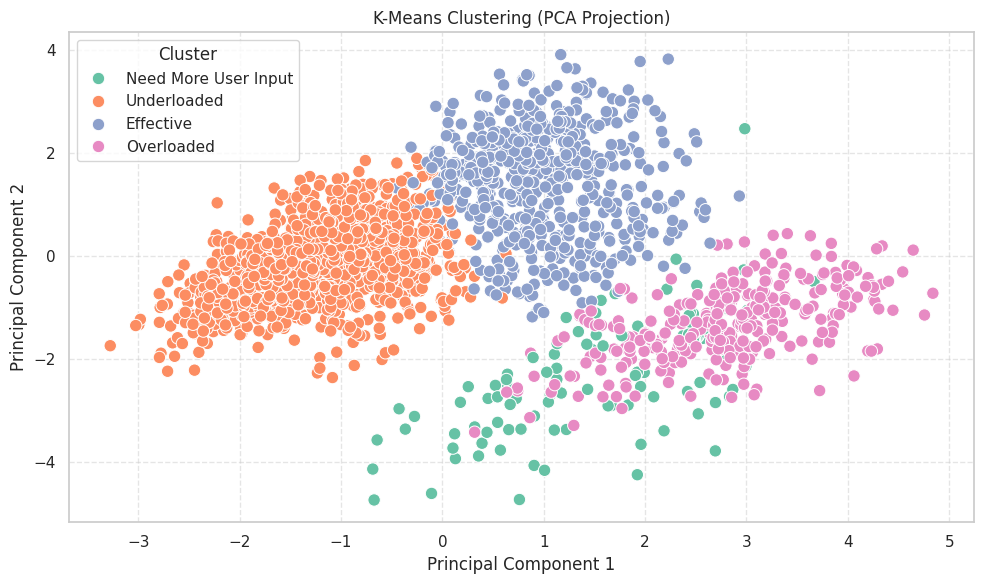

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Cluster"] = clusters
plt.figure(figsize=(8, 6))

cluster_label_map = {
    0: "Underloaded",
    1: "Effective",
    2: "Need More User Input",
    3: "Overloaded"  # etc. based on your interpretation
}

# label clusters
df_pca["Cluster_Label"] = df_pca["Cluster"].map(cluster_label_map)

# plot PCA of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Cluster_Label", palette="Set2", s=80)
plt.title("K-Means Clustering (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

In [ ]:
#data_original = pd.read_csv("final_final_gender.csv", index_col="User ID")
data_copy = data_scaled.copy()
data_copy["Cluster"] = clusters

In [ ]:
data_copy.head()

,Age,Sleep,HRV,Sleep Heart Rate,high_pos,low_pos,high_neg,low_neg,Neutral,Steps,Tiredness,Calm,Nutrition,Hydration,Performance,Gender_encode,Cluster
User ID,,,,,,,,,,,,,,,,,
2N57YUL8awNjuVW7zj3HbKF19Ap2,-2.182127,0.043300,0.746137,0.332965,-0.589768,-0.262613,-0.589768,0.0,1.101946,1.956332,-1.515696,1.741433,-1.928169,1.046289,0.014971,-4.622545,2
2N57YUL8awNjuVW7zj3HbKF19Ap2,-2.182127,0.498359,2.055395,-0.106265,1.695582,-0.262613,-0.589768,0.0,-0.907485,1.269029,-0.412833,-0.072323,-0.243625,0.617161,0.994721,-4.622545,2
2N57YUL8awNjuVW7zj3HbKF19Ap2,-2.182127,0.498359,2.055395,-0.106265,-0.589768,-0.262613,1.695582,0.0,-0.907485,-0.386372,-0.412833,-1.533404,-0.243625,-0.169575,-1.892963,-4.622545,2
2N57YUL8awNjuVW7zj3HbKF19Ap2,-2.182127,-0.447485,-0.563122,-0.106265,-0.589768,-0.262613,-0.589768,0.0,1.101946,1.221746,-0.412833,1.489523,0.430193,-1.027832,0.736892,-4.622545,2
2N57YUL8awNjuVW7zj3HbKF19Ap2,-2.182127,-0.447485,-0.563122,-0.106265,-0.589768,-0.262613,1.695582,0.0,-0.907485,1.084737,0.598126,-1.079965,0.093284,0.402596,-1.738266,-4.622545,2


In [ ]:
cluster_means = data_copy[["low_pos", "low_neg", "high_neg", "high_pos", "Neutral", "Cluster"]].groupby("Cluster").mean()

In [ ]:
performance_means = data_copy.groupby("Cluster")["Performance"].mean()

# Scale performance values between 0 and 1
scaler = MinMaxScaler()
performance_scaled = scaler.fit_transform(performance_means.values.reshape(-1, 1)).flatten()

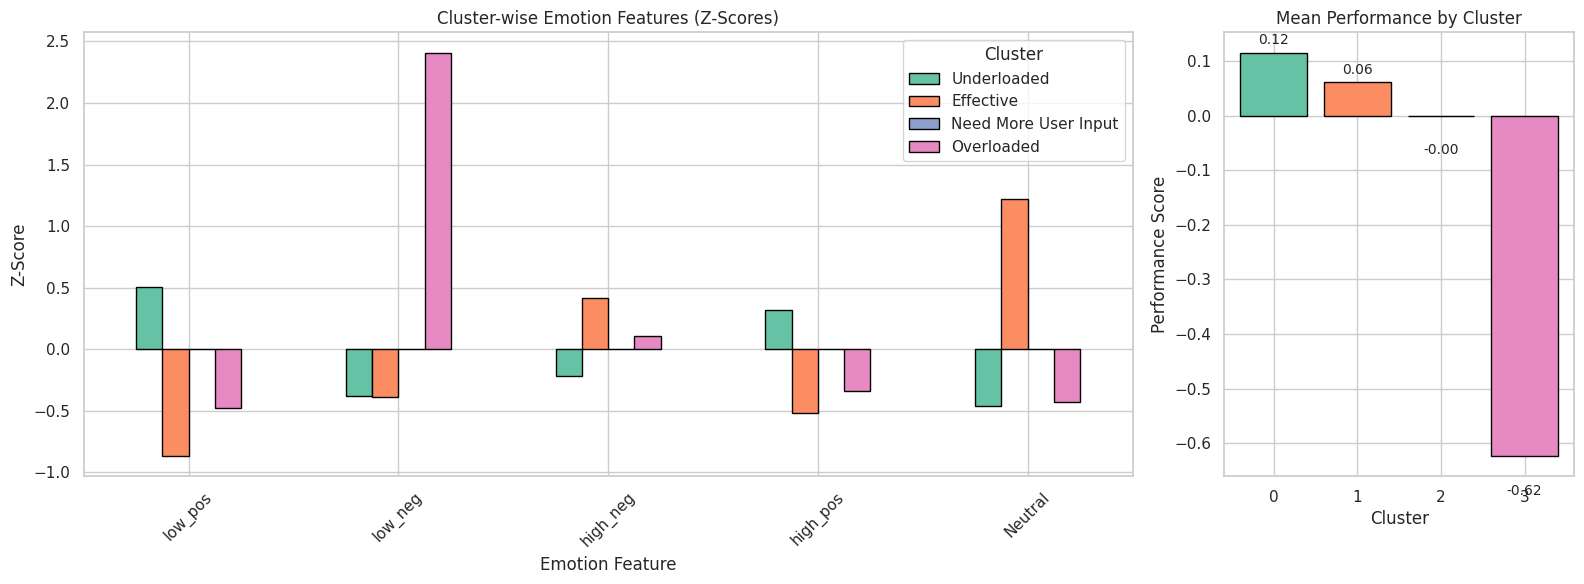

In [ ]:
# Apply custom labels to clusters
cluster_means_labeled = cluster_means.copy()
cluster_means_labeled.index = cluster_means_labeled.index.map(cluster_label_map)

performance_means_labeled = performance_means.copy()
performance_means_labeled.index = performance_means_labeled.index.map(cluster_label_map)

# std per cluster for performance
performance_std = data_copy.groupby("Cluster")["Performance"].std()
performance_std = performance_std.rename(index=cluster_label_map)  # match label names

# --- Setup ---
sns.set(style="whitegrid")
cluster_palette = sns.color_palette("Set2", n_colors=cluster_means.index.nunique())

fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [3, 1]})

# --- Left: Emotion Feature Z-Scores ---
cluster_means_labeled[["low_pos", "low_neg", "high_neg", "high_pos", "Neutral"]].T.plot(
    kind="bar",
    ax=axes[0],
    color=cluster_palette,
    edgecolor="black"
)
axes[0].set_title("Cluster-wise Emotion Features (Z-Scores)")
axes[0].set_ylabel("Z-Score")
axes[0].set_xlabel("Emotion Feature")
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title="Cluster")

# --- Right: Mean Performance ---
performance_means_labeled = performance_means.sort_index()
axes[1].bar(
    performance_means.index.astype(str),
    performance_means.values,
    color=cluster_palette,
    edgecolor="black"
)
axes[1].set_title("Mean Performance by Cluster")
axes[1].set_ylabel("Performance Score")
axes[1].set_xlabel("Cluster")

# Annotate bars with performance values
for idx, val in enumerate(performance_means.values):
    axes[1].text(idx, val + 0.01 if val > 0 else val - 0.05, f"{val:.2f}",
                 ha="center", va="bottom" if val > 0 else "top", fontsize=10)

plt.tight_layout()
plt.show()

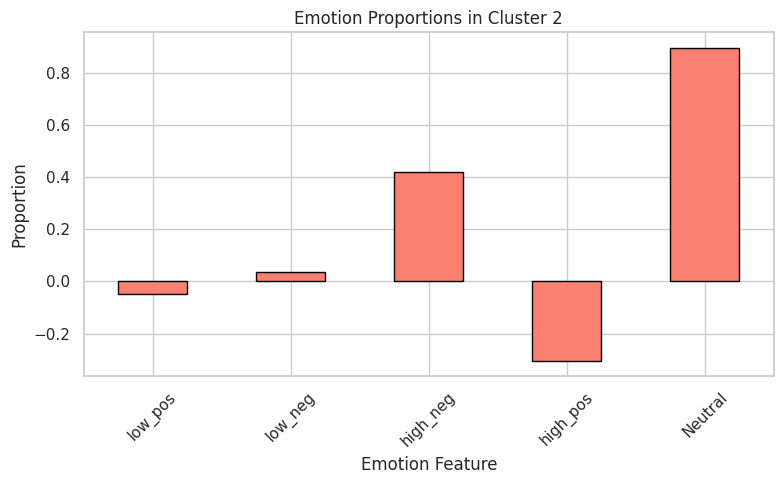

In [ ]:
# Filter data for Cluster 2
cluster_2_data = data_copy[data_copy["Cluster"] == 2]  # or whatever your DataFrame is

# Sum or mean emotion features in that cluster
emotion_features = ["low_pos", "low_neg", "high_neg", "high_pos", "Neutral"]
emotion_sums = cluster_2_data[emotion_features].sum()

# Convert to proportions
emotion_props = emotion_sums / emotion_sums.sum()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
emotion_props.plot(kind="bar", color="salmon", edgecolor="black")
plt.title("Emotion Proportions in Cluster 2")
plt.ylabel("Proportion")
plt.xlabel("Emotion Feature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


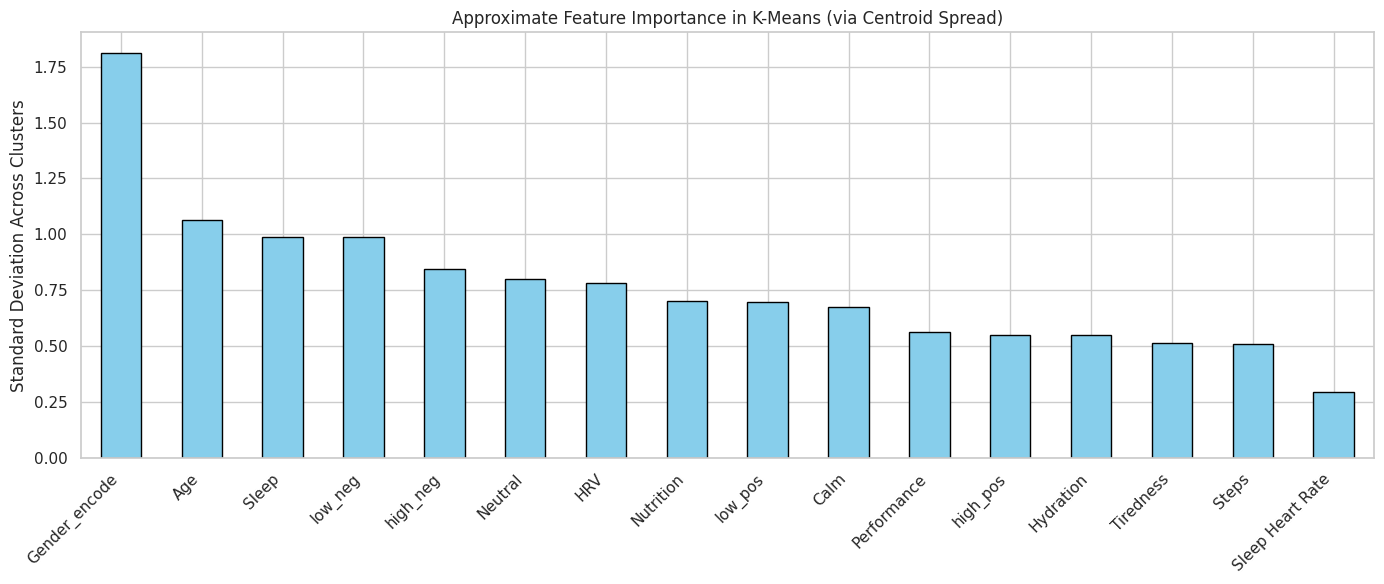

In [ ]:
# After KMeans clustering on X_scaled
centroids = kmeans.cluster_centers_
feature_names = data_scaled.columns # or original feature names if available
feature_names = feature_names.drop("Cluster")

# Put centroids into a DataFrame
centroid_df = pd.DataFrame(centroids, columns=feature_names)

# Compute standard deviation of each feature across clusters
feature_importance = centroid_df.std().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
feature_importance.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Approximate Feature Importance in K-Means (via Centroid Spread)")
plt.ylabel("Standard Deviation Across Clusters")
plt.xticks(rotation=45, ha='right')  # ha='right' improves long label visibility
plt.tight_layout()
plt.show()